<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Test Installation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[Pandas Tutorial](http://pandas.pydata.org/pandas-docs/stable/10min.html)

[Pandas Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

[Pandas Data Structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)

# Data Strutures
## NumPy data structures
### array
[NumPy](http://docs.scipy.org/doc/numpy-1.10.0/user/index.html)'s [ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.ndarray.html),which can be created by function [array](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html#numpy.array),represents a multidimensional, homogeneous array of fixed-size items. 

It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In Numpy dimensions are called axes. The number of axes is rank.

It is more compact than Python's list (usually only 1/5th), and faster. The difference is mostly due to "indirectness" - a Python list is an array of pointers to Python objects, at least 4 bytes per pointer plus 16 bytes for even the smallest Python object (4 for type pointer, 4 for reference count, 4 for value -- and the memory allocators rounds up to 16). A NumPy array is an array of uniform values -- single-precision numbers takes 4 bytes each, double-precision ones, 8 bytes. NumPy also has better performance, see below.

In [2]:
from numpy import arange
from timeit import Timer

Nelements = 10000
Ntimeits = 10000

x = arange(Nelements)
y = range(Nelements)

t_numpy = Timer("x.sum()", "from __main__ import x")
t_list = Timer("sum(y)", "from __main__ import y")
print "numpy: %.3e" % (t_numpy.timeit(Ntimeits)/Ntimeits,)
print "list:  %.3e" % (t_list.timeit(Ntimeits)/Ntimeits,)

numpy: 9.741e-06
list:  5.763e-05


If a NumPy array is initialized with different data types, it will be "upcasted". See example below, the array is initialized as an array of `float`, and then converted to an array of `int`.

In [3]:
a1=np.array([1, 2, 3.0])
a2=a1.astype(int)
print ('a1:\n{}'.format(a1))
print ('a2:\n{}'.format(a2))

a1:
[ 1.  2.  3.]
a2:
[1 2 3]


More [information](http://docs.scipy.org/doc/numpy/user/basics.types.html) of how to specify data types.

Arithmetic operators on arrays apply **elementwise**. NumPy provides familiar mathematical functions such as `sin`, `cos`, and `exp`. In NumPy, these are called “universal functions”(ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output.

## Pandas data structures
### Series
[Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) is a one-dimensional **labeled** array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

It can be created from array(see below):

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

`dtype` could be passed as parameter to create `Series`, if it is omitted then it will be inferred.

It can also be created from dict:

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
s2 = pd.Series(d)
print ('Default order:\n{}'.format(s2))
print ('\nSpecify order:\n{}'.format(pd.Series(d,index=['b', 'c', 'd', 'a'])))

Default order:
a    0.0
b    1.0
c    2.0
dtype: float64

Specify order:
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64


A series can be accessed like array:

In [6]:
s2[1]

1.0

or as a dict:

In [7]:
s2['b']

1.0

### DataFrame
[DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The is the primary pandas data structure.

In [8]:
dates = pd.date_range('20130101', periods=6)
dates #data type is DatetimeIndex

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.648061,-2.111995,2.556937,0.298130
2013-01-02,-0.720924,0.181672,-0.966664,1.116661
2013-01-03,0.011525,0.051869,-0.478106,-1.326468
2013-01-04,1.902907,0.603175,0.595640,2.979935
2013-01-05,0.016976,-0.605902,0.607599,1.683647
2013-01-06,2.023523,-0.195545,1.422884,-0.676794


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [10]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing Data
Both Sereies and DataFrame have `head` or `tail` to show part of long data. More to find in [Essential Basic Functionality](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics).

We can also [visualize](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) data.

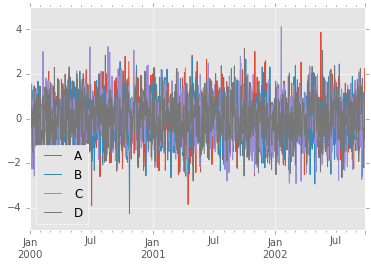

In [12]:
#%matplotlib nbagg
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
plt.figure()
df.plot()

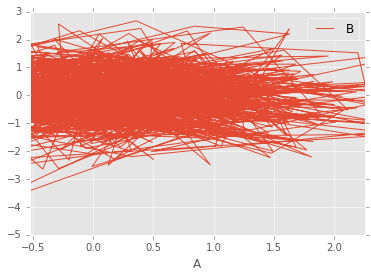

In [13]:
df.plot(x='A',y='B')

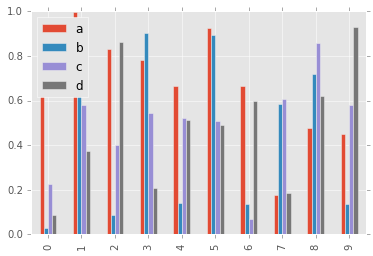

In [14]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()

In [15]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>